<h1> Python Basics </h1>

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
data_path = 'Data/hungarian.data'
column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', sep=',', names=column_names, header=None)


<h3> Data Exploration

In [185]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [186]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [187]:
df.shape

(294, 14)

In [188]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [189]:
df.applymap(lambda x: '?' in str(x)).sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

<h3>Data Manipulation</h3>

In [190]:
df['trestbps'] = df['trestbps'].apply(lambda x: np.nan if x == '?' else x)
df['chol'] = df['chol'].apply(lambda x: np.nan if x == '?' else x)
df['fbs'] = df['fbs'].apply(lambda x: np.nan if x == '?' else x)
df['restecg'] = df['restecg'].apply(lambda x: 0 if x == '?' else x)
df['thalach'] = df['thalach'].apply(lambda x: np.nan if x == '?' else x)
df['exang'] = df['exang'].apply(lambda x: 0 if x == '?' else x)
df['slope'] = df['slope'].apply(lambda x: np.nan if x == '?' else x)
df['ca'] = df['ca'].apply(lambda x: np.nan if x == '?' else x)
df['thal'] = df['thal'].apply(lambda x: np.nan if x == '?' else x)

In [191]:
df.applymap(lambda x: '?' in str(x)).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [192]:
missing_data = df.isna().sum() / len(df) * 100
print(missing_data)

age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.340136
chol         7.823129
fbs          2.721088
restecg      0.000000
thalach      0.340136
exang        0.000000
oldpeak      0.000000
slope       64.625850
ca          98.979592
thal        90.476190
num          0.000000
dtype: float64


In [193]:
to_drop_l = missing_data[missing_data > 60].index.tolist()

df = df.drop(to_drop_l, axis=1)

In [194]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')


In [195]:
#df[['trestbps','chol','thalach']] = df[['trestbps','chol','thalach']].astype('Float64')
df[['fbs','restecg','exang', 'num']] = df[['fbs','restecg','exang','num']].astype('category')

print(df.dtypes)

age            int64
sex            int64
cp             int64
trestbps      object
chol          object
fbs         category
restecg     category
thalach       object
exang       category
oldpeak      float64
num         category
dtype: object


In [196]:
sex_map = {0: 'female', 1:'male'}
restecg_map = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'}
exang_map = {0: 'no', 1: 'yes'}
target_map = {0: 'No Disease', 1: 'Disease'}

In [197]:
df['sex'] = df['sex'].map(sex_map)
df['restecg'] = df['restecg'].map(restecg_map)
df['exang'] = df['exang'].map(exang_map)
df['num'] = df['num'].map(target_map)

In [198]:
df = df.rename(columns={"num":"target"})

In [199]:
df.groupby('target').mean()

C:\Users\sypni\AppData\Local\Temp\ipykernel_11936\1585397971.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('target').mean()


,age,cp,oldpeak
target,,,
No Disease,46.893617,2.617021,0.214362
Disease,49.481132,3.632075,1.245283


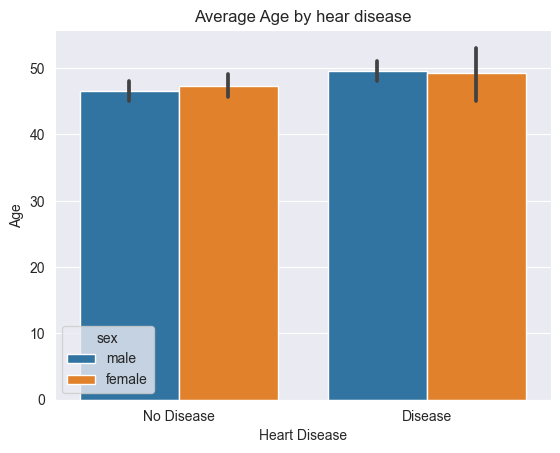

In [202]:
sns.barplot(x = 'target', y = 'age', hue = 'sex', data = df)
plt.title('Average Age by hear disease')
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.show()